Sample of normalized data:
    id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            0     0      0   
1   1  20228    1     156    85.0    140     90            1     0      0   
2   2  18857    1     165    64.0    130     70            1     0      0   
3   3  17623    2     169    82.0    150    100            0     0      0   
4   4  17474    1     156    56.0    100     60            0     0      0   

   alco  active  cardio  overweight  
0     0       1       0           0  
1     0       1       1           1  
2     0       0       1           0  
3     0       1       1           1  
4     0       0       0           0  


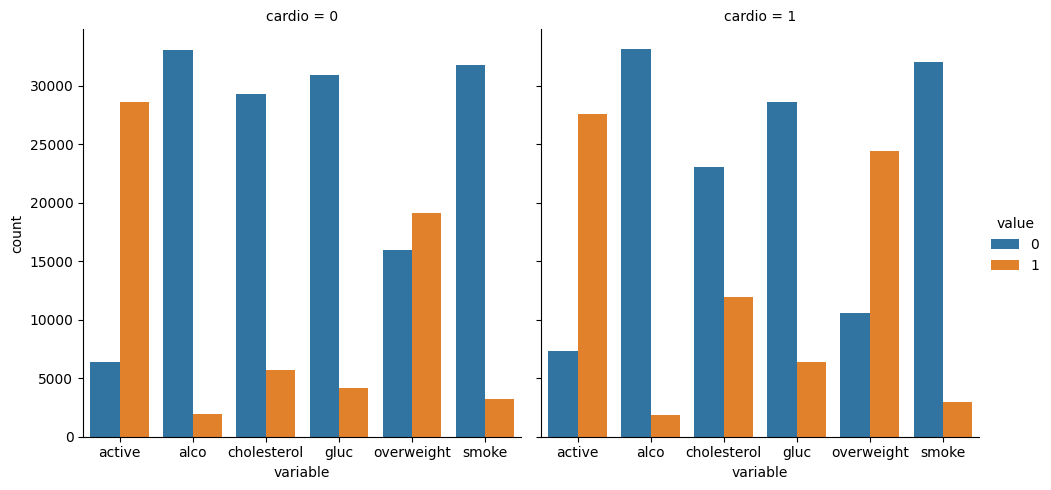

Shape of cleaned data: (63259, 14)


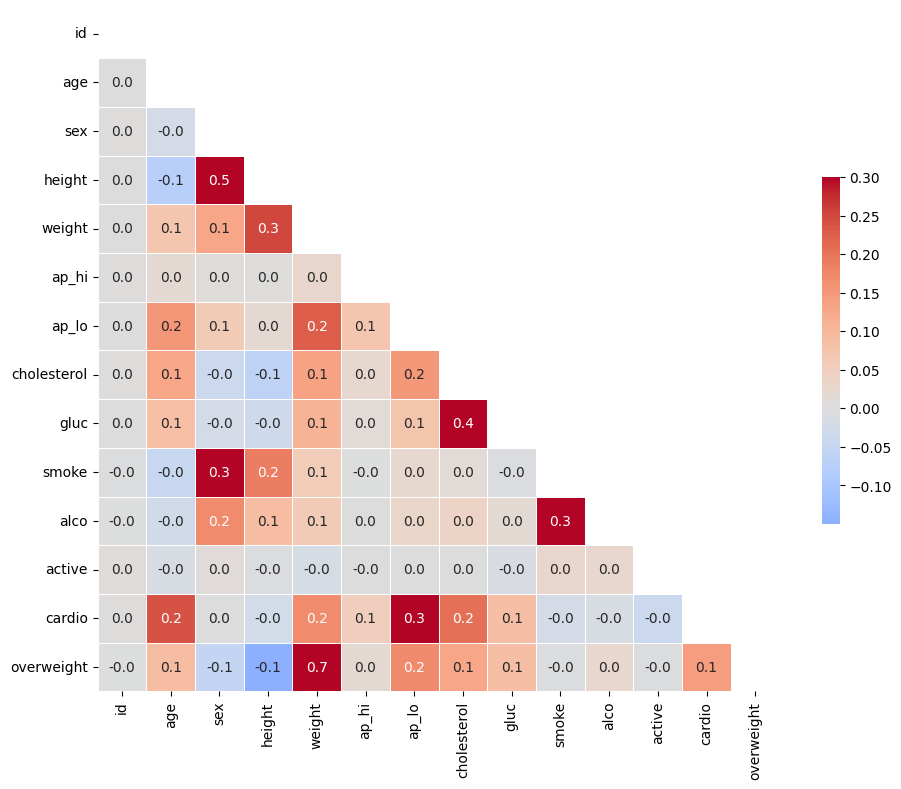

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Raw URL for the 'medical_examination.csv' file
url = 'https://raw.githubusercontent.com/OYanez85/Numpy_freecodecamp/4419d2fa94e4fad8579bec5287aa741f9dfb00bf/medical_examination.csv'

# Load the dataset
df = pd.read_csv(url)

# Step 2: Add an Overweight Column
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)

# Step 3: Normalize the Data
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

# Print normalized data sample
print("Sample of normalized data:\n", df.head())

# Step 4: Convert Data into Long Format and Create the Chart
# Melt the DataFrame
df_melt = df.melt(id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

# Create the catplot
catplot = sns.catplot(x='variable', hue='value', col='cardio', data=df_melt, kind='count')
plt.show()

# Step 5: Clean the Data
df_clean = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

# Print the shape of the cleaned data
print("Shape of cleaned data:", df_clean.shape)

# Step 6: Create a Correlation Matrix
# Calculate the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap
heatmap = sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
